## Importing Libraries :

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Importing and Checking Data :

In [2]:
data = pd.read_csv('USvideos.csv')

In [3]:
data.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [4]:
data.describe()

category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
data.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [7]:
data.head(1)

video_id trending_date                               title  \
0  2kyS6SvSYSE      17.14.11  WE WANT TO TALK ABOUT OUR MARRIAGE   

  channel_title  category_id              publish_time             tags  \
0  CaseyNeistat           22  2017-11-13T17:13:01.000Z  SHANtell martin   

    views  likes  dislikes  comment_count  \
0  748374  57527      2966          15954   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...

Among all the above features, we can drop the features like **title** , **channel_title** , **tags** and **description** because two or more videos can very well have same titles, tags and descriptions. Moreover it is a known fact that **channel_title** does not have any effect on the performance of a video on YouTube. 

YouTube only favours the videos that get higher responses like views, comments and likes from viewers

Apart from this we can also drop features like **thumbnail_link**. But we need to check whether in any video the comments or ratings have been disabled after the publishing of the video because of some particular social or ethical reasons. Also, sometimes YouTube deletes a video on violation of certain Civil Rights or Rules, or because of Copyright Infringement.

In [8]:
data.loc[(data['comment_count']>=1) & (data['comments_disabled'] == True)]

Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description]
Index: []

So we can drop the column **comments_disabled** as there are no such videos in this Data Set.

In [9]:
data.loc[(data['views']>=1) & (data['video_error_or_removed'] == True)]

video_id trending_date  \
2203   RK_B4Ez4_5Q      17.25.11   
15499  kZete48ZtsY      18.01.02   
15755  kZete48ZtsY      18.02.02   
15980  kZete48ZtsY      18.03.02   
30354  q8v9MvManKE      18.23.04   
30571  q8v9MvManKE      18.24.04   
30785  q8v9MvManKE      18.25.04   
30997  q8v9MvManKE      18.26.04   
31212  q8v9MvManKE      18.27.04   
31429  q8v9MvManKE      18.28.04   
31635  q8v9MvManKE      18.29.04   
31855  q8v9MvManKE      18.30.04   
32068  q8v9MvManKE      18.01.05   
32284  q8v9MvManKE      18.02.05   
32498  q8v9MvManKE      18.03.05   
32706  q8v9MvManKE      18.04.05   
32758  1Aoc-cd9eYs      18.05.05   
32971  1Aoc-cd9eYs      18.06.05   
33187  1Aoc-cd9eYs      18.07.05   
33414  1Aoc-cd9eYs      18.08.05   
33620  1Aoc-cd9eYs      18.09.05   
33837  1Aoc-cd9eYs      18.10.05   
34594  1Aoc-cd9eYs      18.14.05   

                                                   title  \
2203   Verizon 360 Live: The Macy’s Thanksgiving Day ...   
15499                                      Deleted video   
15755                                      Deleted video   
15980                                      Deleted video   
30354                       Earth Day 2018 Google Doodle   
30571                       Earth Day 2018 Google Doodle   
30785                       Earth Day 2018 Google Doodle   
30997                       Earth Day 2018 Google Doodle   
31212                       Earth Day 2018 Google Doodle   
31429                       Earth Day 2018 Google Doodle   
31635                       Earth Day 2018 Google Doodle   
31855                       Earth Day 2018 Google Doodle   
32068                       Earth Day 2018 Google Doodle   
32284                       Earth Day 2018 Google Doodle   
32498                       Earth Day 2018 Google Doodle   
32706                       Earth Day 2018 Google Doodle   
32758  Cobra Kai Ep 2 - Strike First - The Karate Kid...   
32971  Cobra Kai Ep 2 - Strike First - The Karate Kid...   
33187  Cobra Kai Ep 2 - Strike First - The Karate Kid...   
33414  Cobra Kai Ep 2 - Strike First - The Karate Kid...   
33620  Cobra Kai Ep 2 - Strike First - The Karate Kid...   
33837  Cobra Kai Ep 2 - Strike First - The Karate Kid...   
34594  Cobra Kai Ep 2 - Strike First - The Karate Kid...   

                channel_title  category_id              publish_time  \
2203                  Verizon           24  2017-11-23T19:51:07.000Z   
15499          Midnight Video            1  2018-01-29T13:00:00.000Z   
15755  DaHoopSpot Productions           17  2017-12-16T04:29:25.000Z   
15980  DaHoopSpot Productions           17  2017-12-16T04:29:25.000Z   
30354           googledoodles            1  2018-04-21T15:00:50.000Z   
30571           googledoodles            1  2018-04-21T15:00:50.000Z   
30785           googledoodles            1  2018-04-21T15:00:50.000Z   
30997           googledoodles            1  2018-04-21T15:00:50.000Z   
31212           googledoodles            1  2018-04-21T15:00:50.000Z   
31429           googledoodles            1  2018-04-21T15:00:50.000Z   
31635           googledoodles            1  2018-04-21T15:00:50.000Z   
31855           googledoodles            1  2018-04-21T15:00:50.000Z   
32068           googledoodles            1  2018-04-21T15:00:50.000Z   
32284           googledoodles            1  2018-04-21T15:00:50.000Z   
32498           googledoodles            1  2018-04-21T15:00:50.000Z   
32706           googledoodles            1  2018-04-21T15:00:50.000Z   
32758               Cobra Kai           24  2018-05-02T16:02:35.000Z   
32971               Cobra Kai           24  2018-05-02T16:02:35.000Z   
33187               Cobra Kai           24  2018-05-02T16:02:35.000Z   
33414               Cobra Kai           24  2018-05-02T16:02:35.000Z   
33620               Cobra Kai           24  2018-05-02T16:02:35.000Z   
33837               Cobra Kai           24  2018-05-02T16:02:35.000Z   
34594               Cobra Kai           24  2018

We cannot drop this feature because we can see there are **removed videos** with significant number of viewer interaction. 

In [10]:
data.loc[((data['likes']>=1) | (data['dislikes']>=1)) & (data['ratings_disabled'] == True)]

Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description]
Index: []

We can safely drop this feature too. 

In [11]:
data['trending_date'].nunique()

205

In [12]:
data['publish_time'].nunique()

6269

Let us drop the features that we have determined to be irrelevant :

In [13]:
data.drop(['title', 'channel_title', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description'], axis = 1, inplace = True)

In [14]:
data.head(2)

video_id trending_date  category_id              publish_time    views  \
0  2kyS6SvSYSE      17.14.11           22  2017-11-13T17:13:01.000Z   748374   
1  1ZAPwfrtAFY      17.14.11           24  2017-11-13T07:30:00.000Z  2418783   

   likes  dislikes  comment_count  video_error_or_removed  
0  57527      2966          15954                   False  
1  97185      6146          12703                   False

## Exploratory Data Analysis :

Text(0.5, 0, 'Video Category')

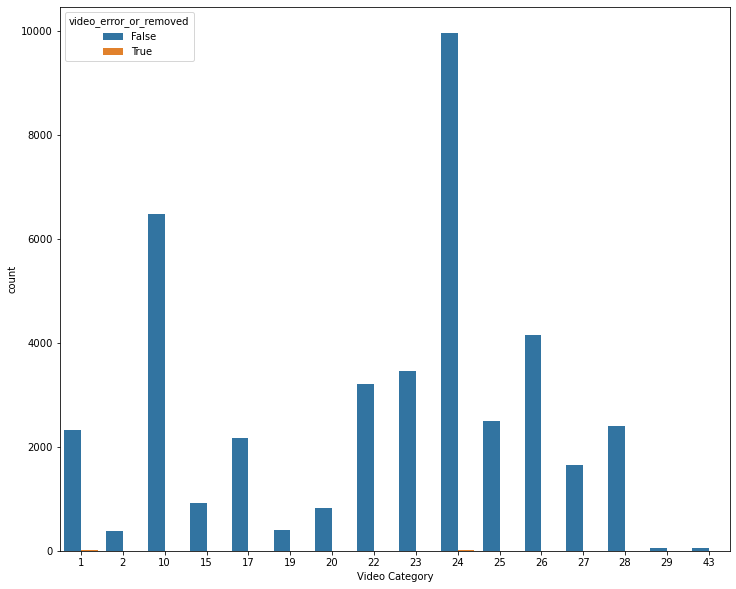

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(x='category_id',hue='video_error_or_removed',data=data)
plt.xlabel('Video Category')

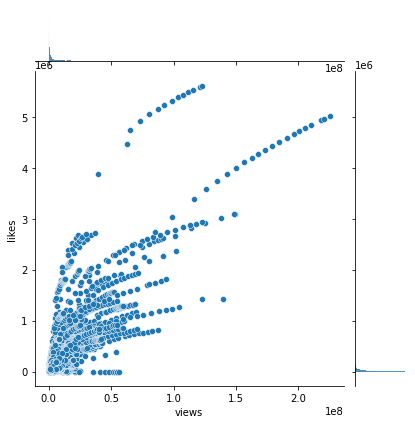

In [16]:
#plt.figure(figsize=(12,10))
sns.jointplot(x='views',y='likes',data=data)

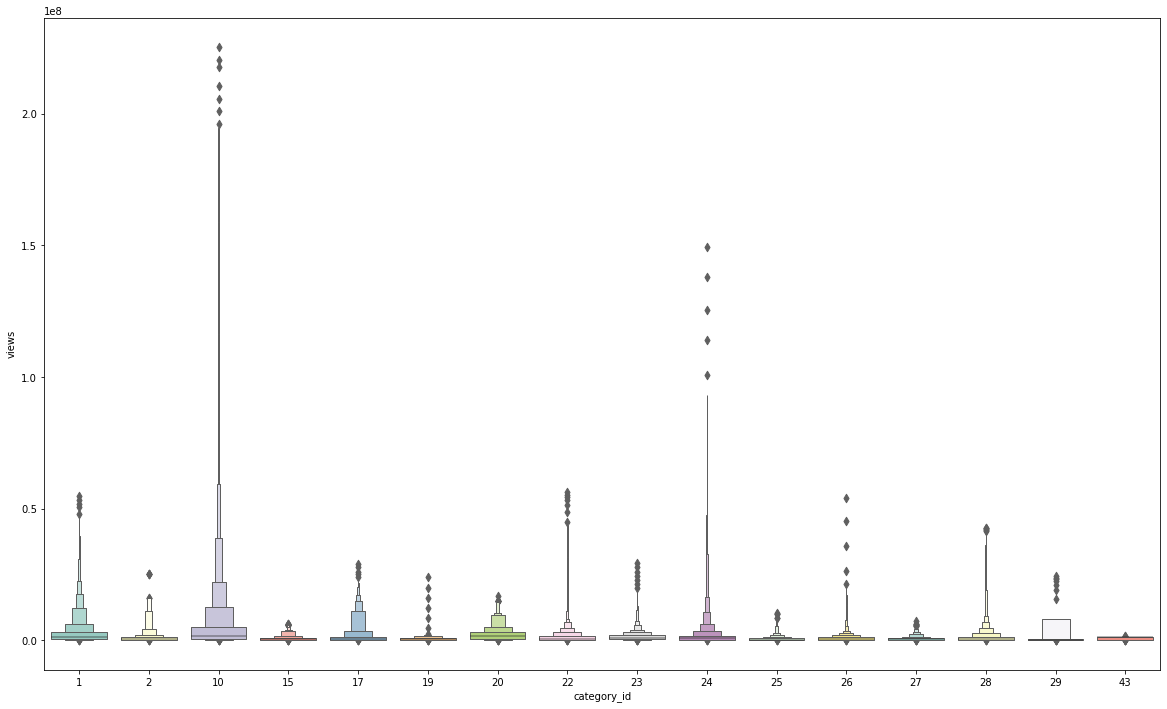

In [17]:
plt.figure(figsize=(20,12))
ax = sns.boxenplot(x="category_id", y="views",data=data, palette="Set3")

We can clearly see a pattern in this plot, irrespective of the category a video falls under. In every category, most videos have average to decent number of views , but in every category very few videos have a huge number of views. 

In [18]:
data1 = data.drop(['video_id','trending_date','publish_time','video_error_or_removed'], axis = 1)

In [19]:
data1.head()

category_id    views   likes  dislikes  comment_count
0           22   748374   57527      2966          15954
1           24  2418783   97185      6146          12703
2           23  3191434  146033      5339           8181
3           24   343168   10172       666           2146
4           24  2095731  132235      1989          17518

<AxesSubplot:>

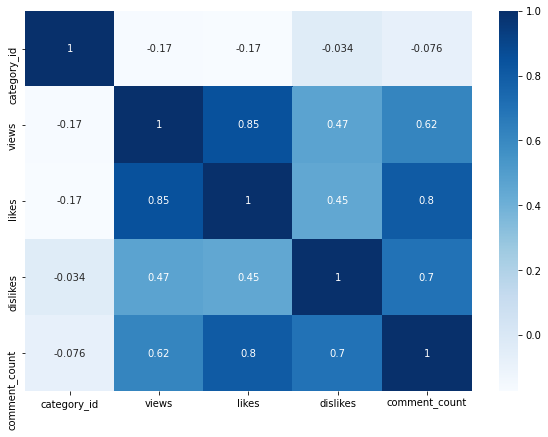

In [20]:
plt.subplots(figsize=(10,7)) 
sns.heatmap(data1.corr(), annot = True, cmap="Blues")

From the above plot we can see that the features **Views** , **Likes**, **Dislikes** and **Comment Count** are highly correlated, but **Video Category** has little to do with how a video will perform.

In [21]:
data2 = data.drop(['category_id','video_id','trending_date','publish_time','video_error_or_removed'], axis = 1)

In [22]:
data2.head()

views   likes  dislikes  comment_count
0   748374   57527      2966          15954
1  2418783   97185      6146          12703
2  3191434  146033      5339           8181
3   343168   10172       666           2146
4  2095731  132235      1989          17518

## Creating the Model :

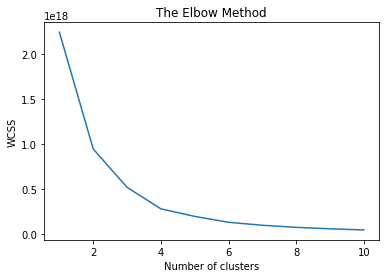

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Let us try to find the appropriate number of clusters after trying to scale the features **Views** , **Likes**, **Dislikes** and **Comment Count**.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#### Standardization :

In [25]:
sc = StandardScaler()
df1 = sc.fit_transform(data2)

In [26]:
df1.shape

(40949, 4)

In [27]:
df1 = pd.DataFrame(df1, columns = data2.columns)

In [28]:
df1.head(1)

views     likes  dislikes  comment_count
0 -0.218069 -0.073137 -0.025677       0.200566

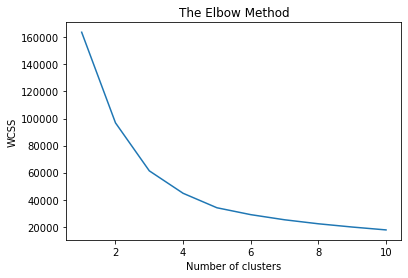

In [29]:
wcss2=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1,11),wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Normalization :

In [30]:
nm =  Normalizer()
df2 = nm.fit_transform(data2)

In [31]:
df2.shape

(40949, 4)

In [32]:
df2 = pd.DataFrame(df2, columns = data2.columns)

In [33]:
df2.head()

views     likes  dislikes  comment_count
0  0.996826  0.076625  0.003951       0.021251
1  0.999177  0.040146  0.002539       0.005247
2  0.998950  0.045710  0.001671       0.002561
3  0.999540  0.029628  0.001940       0.006251
4  0.997980  0.062970  0.000947       0.008342

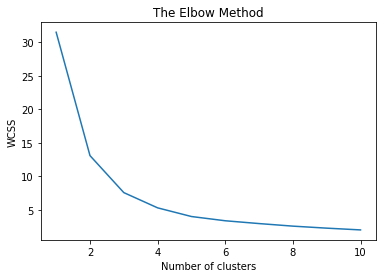

In [34]:
wcss3=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df2)
    wcss3.append(kmeans.inertia_)
plt.plot(range(1,11),wcss3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly see that Standardization or Normalization brings a certain amount of clarity in the number of clusters that can be formed. There is a sharp decline in the value of Sum of Square distances within each clusters upto somewhere around 5 on the X axis of the above two plots.

#### K-Means :

In [39]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(df2)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [40]:
df1['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df1['views'],
    y= df1['likes'],
    z= df1['comment_count'],
    mode='markers',
     marker=dict(
        color = df1['label3'], 
        size= 10,
        line=dict(
            color= df1['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Views'),
            yaxis = dict(title  = 'Likes'),
            zaxis = dict(title  = 'Comment Count')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## Conclusions :
1. In the three dimensional plot, we can clearly see that not all videos have performed the same in terms of **views**, **comments** and **likes**. 
2. There might be more to the story than meets the eye because humans cannot visualize any more than 3 dimensions, and it so might happen that there is an $N^{th}$ dimension which the machine can understand but unfortunately we humans cannot.